# HW250513-implement_a_customized_neural_network

## Exercise 1: simplify building NN & weight updating

### My way

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

注意 `nn.Linear` 的計算方式:
$$ y = xA^T + b $$

與我們先前作業的方式不同:
``` Python
net_h = i @ w_ih + b1
```
這會影響到權重陣列輸出入時的格式。

In [2]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer   = nn.Linear(2, 2)
        self.hidden_layer_activation = nn.Sigmoid()
        self.hidden_to_output_layer  = nn.Linear(2, 2)
        self.output_layer_activation = nn.Sigmoid()
        with torch.no_grad():
            # self.input_to_hidden_layer.weight.data  = torch.tensor([[0.15, 0.25], [0.20, 0.30]])
            self.input_to_hidden_layer.weight.data  = torch.tensor([[0.15, 0.20], [0.25, 0.30]])
            self.input_to_hidden_layer.bias.data    = torch.tensor([0.35])
            # self.hidden_to_output_layer.weight.data = torch.tensor([[0.40, 0.50], [0.45, 0.55]])
            self.hidden_to_output_layer.weight.data = torch.tensor([[0.40, 0.45], [0.50, 0.55]])
            self.hidden_to_output_layer.bias.data   = torch.tensor([0.60])
    def forward(self, x):
        self.h_in  = self.input_to_hidden_layer(x)
        self.h_out = self.hidden_layer_activation(self.h_in)
        self.o_in  = self.hidden_to_output_layer(self.h_out)
        self.o_out = self.hidden_layer_activation(self.o_in)
        return self.o_out

In [3]:
model = MyModule()
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.5)

x = torch.tensor([[0.05, 0.10]]).float()
y = torch.tensor([[0.01, 0.99]]).float()

In [4]:
loss_hist = []
for iter in range(10000):
    loss_value = loss_fn(model(x), y)
    loss_hist.append(loss_value.item())
    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()
    
    if iter == 0:
        print("h_in =", model.h_in)
        print("h_out =", model.h_out)
        print("o_in =", model.o_in)
        print("o_out =", model.o_out)
        print("err =", loss_value.item())
        print("-"*60)
        print("w_ih =", model.input_to_hidden_layer.weight)
        print("w_ho =", model.hidden_to_output_layer.weight)
        print("b_h =", model.input_to_hidden_layer.bias)
        print("b_o =", model.hidden_to_output_layer.bias)
        print("-"*60)
print("epochs = 10000, loss = ", loss_hist[-1])

h_in = tensor([[0.3775, 0.3925]], grad_fn=<AddmmBackward0>)
h_out = tensor([[0.5933, 0.5969]], grad_fn=<SigmoidBackward0>)
o_in = tensor([[1.1059, 1.2249]], grad_fn=<AddmmBackward0>)
o_out = tensor([[0.7514, 0.7729]], grad_fn=<SigmoidBackward0>)
err = 0.2983711063861847
------------------------------------------------------------
w_ih = Parameter containing:
tensor([[0.1498, 0.1996],
        [0.2498, 0.2995]], requires_grad=True)
w_ho = Parameter containing:
tensor([[0.3589, 0.4087],
        [0.5113, 0.5614]], requires_grad=True)
b_h = Parameter containing:
tensor([0.3406], requires_grad=True)
b_o = Parameter containing:
tensor([0.5498], requires_grad=True)
------------------------------------------------------------
epochs = 10000, loss =  4.356453246145975e-06


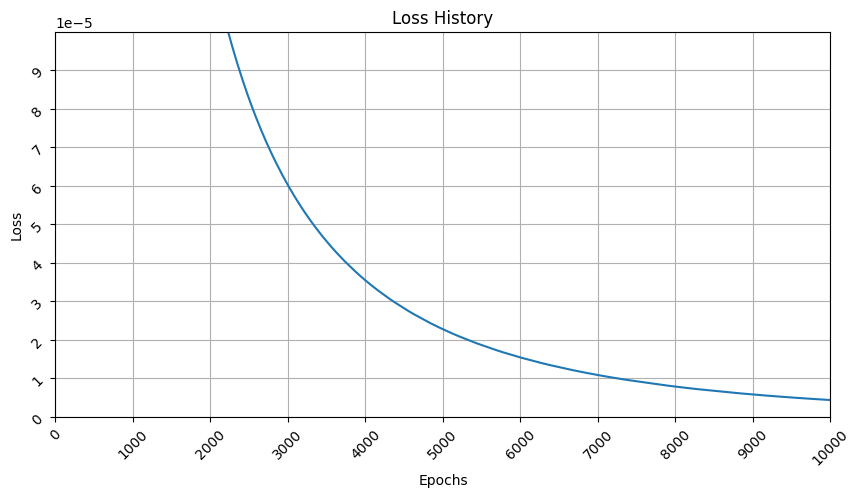

In [5]:
plt.figure(figsize=(10,5))
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xlim(0, 10000)
plt.ylim(0, 0.0001)
plt.grid()
plt.xticks(np.arange(0, 10001, 1000))
plt.yticks(np.arange(0, 0.0001, 0.00001))
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.plot(loss_hist)
plt.show()

### ChatGPT ver.
* 有經過人工微調，並非AI原始生成出來的版本。
* 特點:
    1. weight 跟 bias 由 `nn.Parameter` 賦予。
    2. bias 由 1 * 1 變為 1 * 2 ，促使損失率下降。

In [6]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

In [7]:
x = torch.tensor([[0.05, 0.10]]).float()
y = torch.tensor([[0.01, 0.99]]).float()

In [8]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(2, 2)  # input: 2, hidden: 2
        self.output = nn.Linear(2, 2)  # hidden: 2, output: 2

        # 手動設定初始權重和偏置
        self.hidden.weight = nn.Parameter(torch.tensor([[0.15, 0.2], [0.25, 0.3]]))
        self.hidden.bias   = nn.Parameter(torch.tensor([0.35, 0.35]))
        self.output.weight = nn.Parameter(torch.tensor([[0.4, 0.45], [0.5, 0.55]]))
        self.output.bias   = nn.Parameter(torch.tensor([0.6, 0.6]))

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        self.h_in  = self.hidden(x)
        self.h_out = self.sigmoid(self.h_in)
        self.o_in  = self.output(self.h_out)
        self.o_out = self.sigmoid(self.o_in)
        return self.o_out

In [9]:
model = MyModule()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)

In [10]:
loss_hist2 = []
for iter in range(10000):
    y_pred = model(x)
    
    loss = criterion(y_pred, y)
    loss_hist2.append(loss.item())
    # backward pass 與更新參數
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 初始狀態印出 forward 值與 loss
    if iter == 0:
        print("h_in =", model.h_in)
        print("h_out =", model.h_out)
        print("o_in =", model.o_in)
        print("o_out =", model.o_out)
        print("err =", loss.item())
        print("-"*60)
        print("w_ih =", model.hidden.weight)
        print("w_ho =", model.output.weight)
        print("b_h =", model.hidden.bias)
        print("b_o =", model.output.bias)
        print("-"*60)
print("epochs = 10000, loss = ", loss_hist2[-1])

h_in = tensor([[0.3775, 0.3925]], grad_fn=<AddmmBackward0>)
h_out = tensor([[0.5933, 0.5969]], grad_fn=<SigmoidBackward0>)
o_in = tensor([[1.1059, 1.2249]], grad_fn=<AddmmBackward0>)
o_out = tensor([[0.7514, 0.7729]], grad_fn=<SigmoidBackward0>)
err = 0.2983711063861847
------------------------------------------------------------
w_ih = Parameter containing:
tensor([[0.1498, 0.1996],
        [0.2498, 0.2995]], requires_grad=True)
w_ho = Parameter containing:
tensor([[0.3589, 0.4087],
        [0.5113, 0.5614]], requires_grad=True)
b_h = Parameter containing:
tensor([0.3456, 0.3450], requires_grad=True)
b_o = Parameter containing:
tensor([0.5308, 0.6190], requires_grad=True)
------------------------------------------------------------
epochs = 10000, loss =  2.4483586003043456e-06


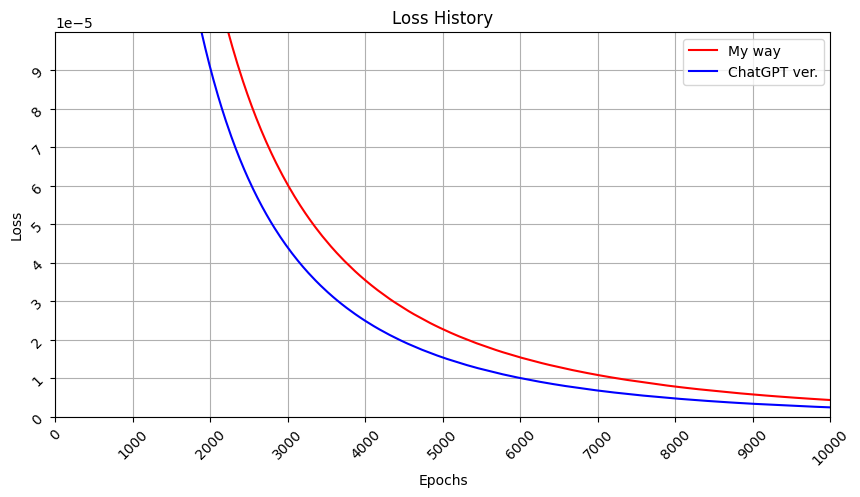

In [11]:
plt.figure(figsize=(10,5))
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xlim(0, 10000)
plt.ylim(0, 0.0001)
plt.grid()
plt.xticks(np.arange(0, 10001, 1000))
plt.yticks(np.arange(0, 0.0001, 0.00001))
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.plot(loss_hist, 'r', label = "My way")
plt.plot(loss_hist2, 'b', label = "ChatGPT ver.")
plt.legend()
plt.show()

## References
* PyTorch: Linear  
https://docs.pytorch.org/docs/stable/generated/torch.nn.Linear.html

## Exercise 2: (未解決)
* build a neural network to classify the IRIS dataset
* the first 40 data points in each class are used for training the model, and the last 10 data points are used for test.
* discuss your results for different setting of your model (batch size, # layers, # hidden nodes, normalization, etc.)

In [12]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

將資料 variety 欄位從文字轉成數字:
Iris-setosa = 0.25, Iris-versicolor = 0.50, Iris-virginica = 0.75

In [13]:
iris = pd.read_csv("~/iris.data")
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']
grouped = iris.groupby('variety')
variety = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]

train_data = []
test_data  = []

for i in range(3):
    group = grouped.get_group(variety[i]).copy()
    group["variety"] = (i + 1) * 0.25
    train_data.append(group.iloc[0:40])
    test_data.append(group.iloc[-10:])
    
train_df = pd.concat(train_data, ignore_index=True)
test_df  = pd.concat(test_data, ignore_index=True)

In [14]:
x = train_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = train_df['variety'].values

X = torch.tensor(x).float()
# Y = torch.tensor(y).float()
Y = torch.tensor(y, dtype = torch.long) #CrossEntropyLoss()

In [15]:
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

ds = MyDataset(X, Y)
dl = DataLoader(ds, batch_size=2, shuffle=True)

In [16]:
model = nn.Sequential(
    nn.Linear(4, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

In [17]:
loss_func = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(), lr=0.01)

import time
loss_hist = []
start = time.time()
for iter in range(50):
    for ix, iy in dl:
        opt.zero_grad()
        loss_value = loss_func(model(ix), iy)
        loss_value.backward()
        opt.step()
        loss_hist.append(loss_value.item())
end = time.time()
print(end - start)

21.78287124633789


3000
epochs = 10000, loss =  0.0


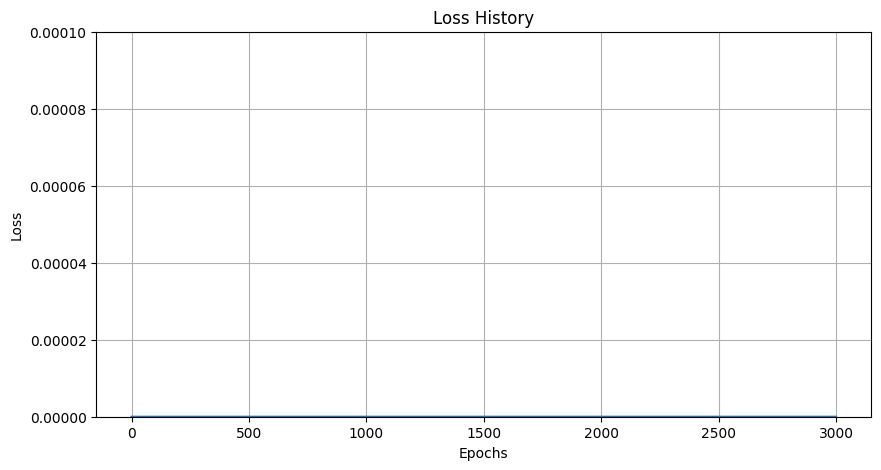

In [18]:
import matplotlib.pyplot as plt
print(len(loss_hist))
print("epochs = 10000, loss = ", loss_hist[-1])
plt.figure(figsize=(10,5))
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
# plt.xlim(0, 10000)
plt.ylim(0, 0.0001)
plt.grid()
# plt.xticks(np.arange(0, 10001, 1000))
# plt.yticks(np.arange(0, 0.0001, 0.00001))
# plt.xticks(rotation = 45)
# plt.yticks(rotation = 45)
plt.plot(loss_hist)
plt.show()